Load the `ISLR2` and `tidyverse` packages.

In [4]:
library('ISLR2')
library('tidyverse')
library('tidymodels')


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.9     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
glimpse(Auto)
head(Auto)

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


Plot `mpg`  as a function of `displacement`.

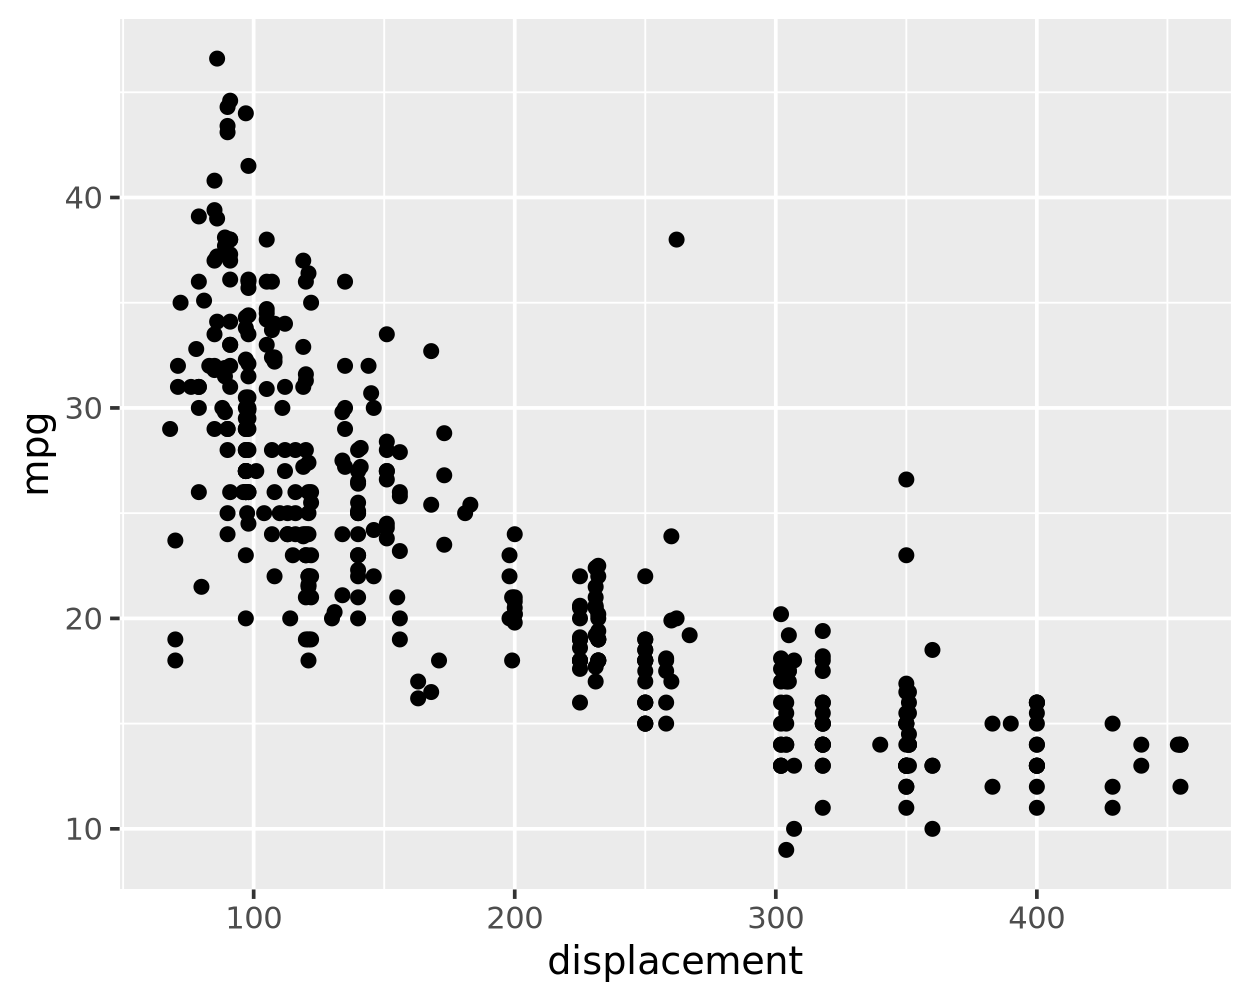

In [6]:
mod = linear_reg() |> set_engine("lm")
plot = ggplot(data=Auto, aes(x=displacement, y=mpg))+
    geom_point()
plot

❓Does the relationship of `mpg` to `displacement` look linear?

Yes, the relationship of mpg to displacement looks negatively linear. 



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

mpg,displacement_poly_1,displacement_poly_2,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,307,94249,0,0,0,1
15,350,122500,0,0,0,1
18,318,101124,0,0,0,1
16,304,92416,0,0,0,1
17,302,91204,0,0,0,1
15,429,184041,0,0,0,1


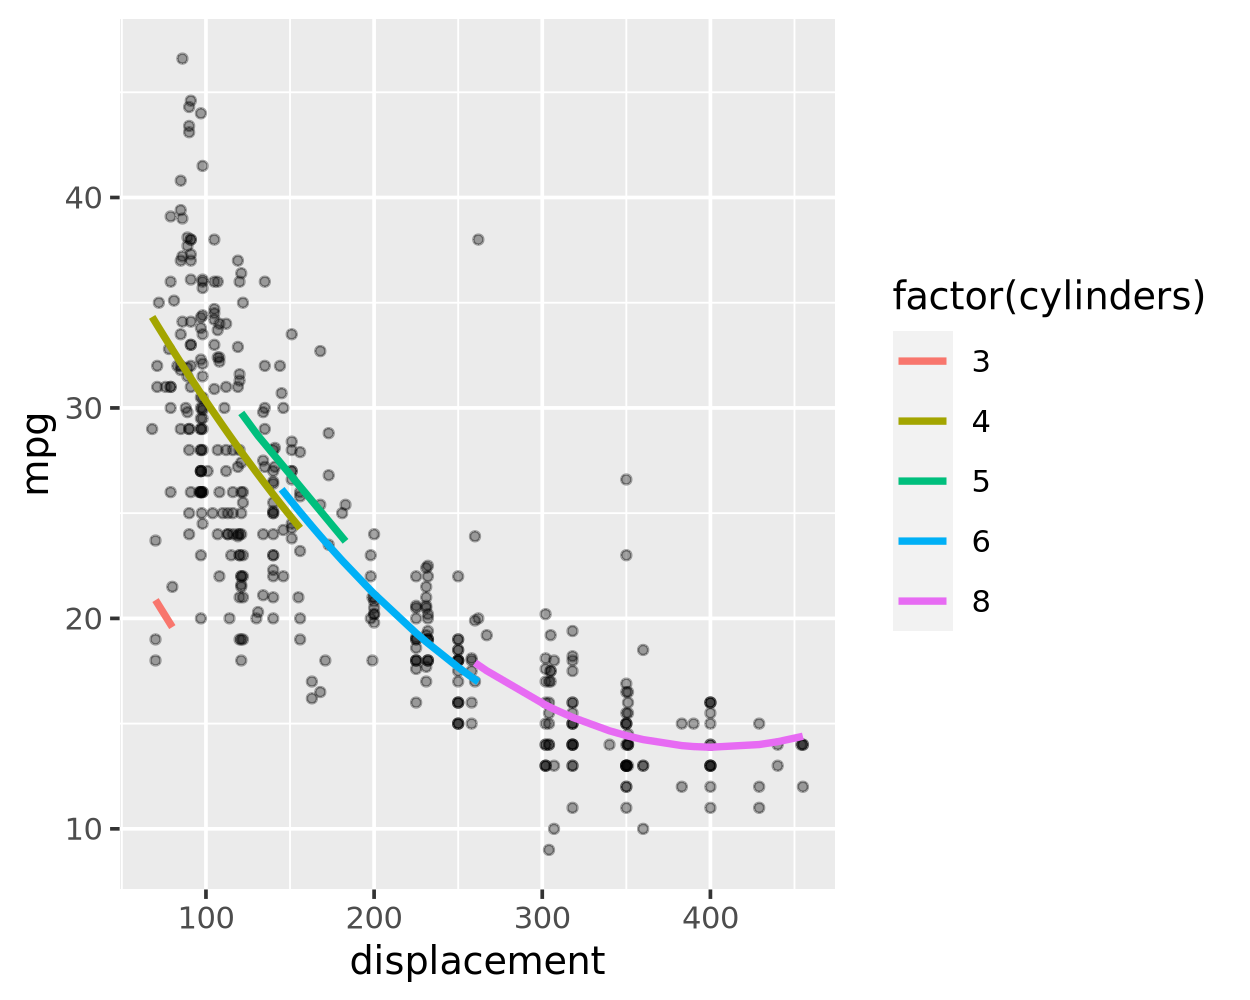

In [11]:
#Using polynomial

rec=recipe(mpg~displacement+cylinders, data=Auto) |>
    step_poly(displacement, degree=2, options=list(raw=TRUE)) |>
    step_mutate(cyl_cat = factor(cylinders))|>
    step_dummy(cyl_cat)|>
    step_rm(cylinders) |>
    prep()

juice(rec) |> head()
mod=linear_reg() |> set_engine('lm')
mod_fit= mod |> fit(mpg~., data=juice(rec))

predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
    ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
